<a href="https://colab.research.google.com/github/alextepper/123/blob/master/titanicProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(-1.1232311584669752, 1.076764652827873, -1.2021245038099437, 1.10485961267668)

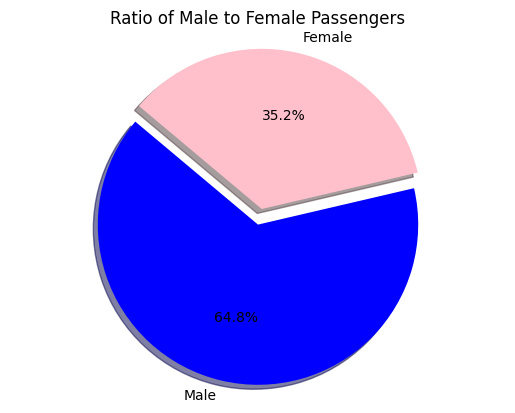

In [7]:
male_count = df[df['Sex'] == 'male'].shape[0]
female_count = df[df['Sex'] == 'female'].shape[0]

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['blue', 'pink']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ratio of Male to Female Passengers')
plt.axis('equal')

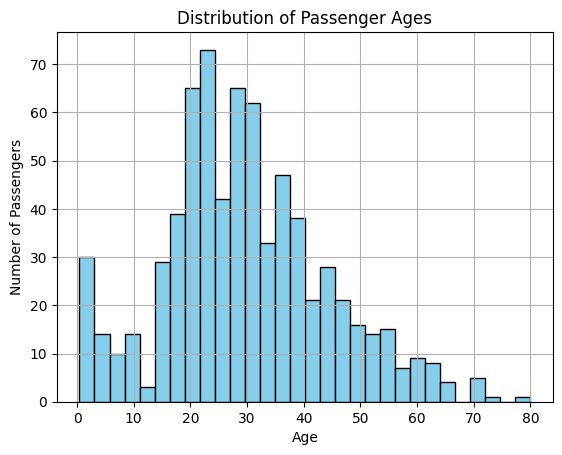

In [8]:
df['Age'].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


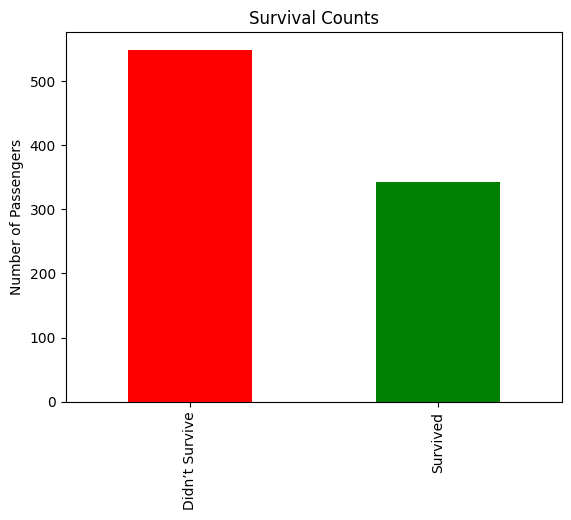

In [9]:
survived_counts = df['Survived'].value_counts()
survived_counts.index = ['Didn’t Survive', 'Survived']

survived_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Counts')
plt.ylabel('Number of Passengers')
plt.show()


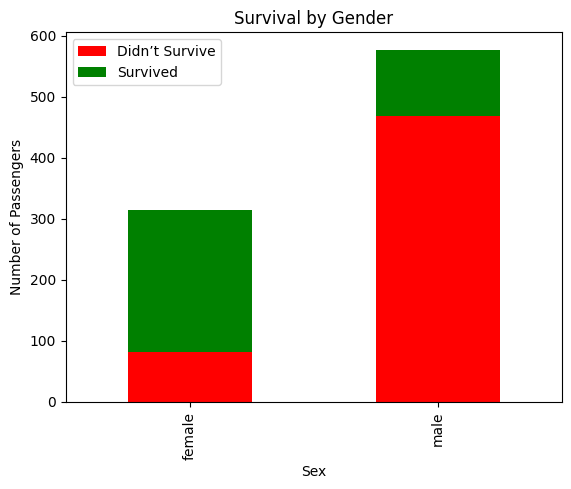

In [10]:
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival.columns = ['Didn’t Survive', 'Survived']

gender_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.show()


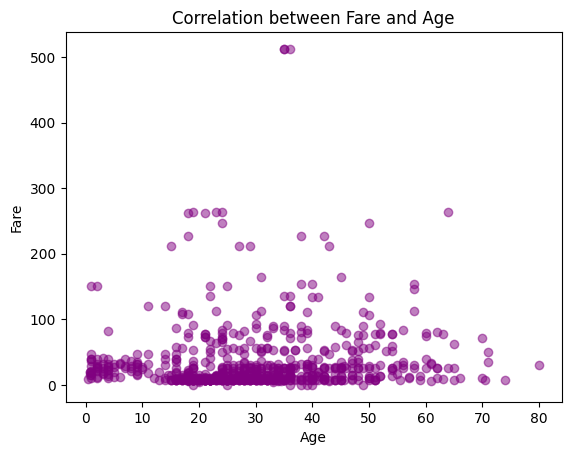

In [11]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5, color='purple')
plt.title('Correlation between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

In [14]:
df_sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, df_sex_encoded], axis=1)

In [16]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,1.0,NaN,C,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,1.0,B51 B53 B55,C,0,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,1.0,B101,C,0,1
